## Socialcops Challenge

#### Working with dataset of each APMC_Commodity inside apmc_commodity folder

##### 1. Import Libraries

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import absolute_import, division, print_function

# Data wrangling
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose

# Display and Plotting
import matplotlib.pyplot as plt


import os
import random


# pandas config
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# set random seed
random.seed(9001)

We have successfully imported all the required packages and libraries. Now, it's time to load the dataset.

##### 2. Load the dataset

Now, I will create a function that can import any CSV file inside the ```apmc_commodity``` folder. 

<b>Remember: </b> The csv filenames are in the format ```apmc_commodity``` i.e. before underscore ( _ ) we are having the commodity name and after underscore ( _ ) we are having the commodity name. So in this way we can import and analyise any APMC and Commodity of our choise.

In [2]:
# Get current working dirctory
def get_cwd():
    return os.getcwd()

data_folder = 'apmc_commodity'

def read_file(filename: str):
    dataset_path = os.path.join(get_cwd(), data_folder, filename)
    return (pd.read_csv(dataset_path, parse_dates = ['date']))

In [3]:
# list down all the filenames
def files_list():
    files = []
    for file in os.listdir(os.path.join(get_cwd(), data_folder)):
        files.append(file)
    return files

file_names = files_list()    

In [7]:
total_files = len(file_names)
total_files # total number of files inside apmc_commodity folder

4830

In [8]:
first_file_name = file_names[0]
first_file_name

'Aamgaon_paddy-unhusked.csv'

In [9]:
aamgaon_paddy = read_file(first_file_name)
aamgaon_paddy

,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,diff_price
0,paddy-unhusked,2014,September,2779,1645,1843,1744,2014-09-01,Gondiya,198
1,paddy-unhusked,2014,October,2195,1591,1749,1670,2014-10-01,Gondiya,158
2,paddy-unhusked,2014,November,10153,1438,1577,1507,2014-11-01,Gondiya,139
3,paddy-unhusked,2014,December,14608,1481,1554,1518,2014-12-01,Gondiya,73
4,paddy-unhusked,2015,January,16775,1505,1562,1533,2015-01-01,Gondiya,57
5,paddy-unhusked,2015,February,7674,1481,1530,1505,2015-02-01,Gondiya,49
6,paddy-unhusked,2015,April,2728,1441,1442,1412,2015-04-01,Gondiya,1
7,paddy-unhusked,2015,May,3688,1367,1425,1402,2015-05-01,Gondiya,58
8,paddy-unhusked,2015,June,9312,1348,1369,1339,2015-06-01,Gondiya,21
9,paddy-unhusked,2015,July,5499,1459,1555,1510,2015-07-01,Gondiya,96


##### Function- 1
* <b>read_file(filename): </b>Read the file  

#### 2. EDA

Let's create small functions to analyse each of the attributes of out dataset.

##### 2.1 diff_price

As we have already removed the entities having <b>diff_price</b> less than zero so now only one thing is important to know, <b>weather the diff_price value is 0 (i.e. min_price, max_price and modal_price remain same) for any entity or not?</b>

In [10]:
# function to show entities having diff_price equals to zero
def diff_price_zero(filename: str):
    apmc_comm = read_file(filename)
    result = apmc_comm[apmc_comm['diff_price'] == 0]
    if (len(result) == 0):
        print("No entity having diff_price equals to zero.")
    else:
        return (result)
    

In [11]:
diff_price_zero(first_file_name)

No entity having diff_price equals to zero.


The function is working fine let's check out the files having diff_price equals to zero.

In [12]:
tenth_file_name = file_names[9]
tenth_file_name

'Achalpur_bajri.csv'

In [16]:
diff_price_zero(tenth_file_name)

,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,diff_price
0,bajri,2014,October,1,1725,1725,1725,2014-10-01,Amaravathi,0
2,bajri,2016,January,2,1700,1700,1700,2016-01-01,Amaravathi,0
3,bajri,2016,February,2,1725,1725,1725,2016-02-01,Amaravathi,0
4,bajri,2016,May,1,1700,1700,1700,2016-05-01,Amaravathi,0


<b>Conclusion: </b>This shows that the <b>Achalpur</b> APMC and <b>bajri</b> commodity is having <b>min_price, max_price, and modal_price same i.e. no fluctuation in price during 2014 (October) and 2016 (January, February, and May).

Let's check out the whole file of 'Achalpur' APMC and 'bajri' commodity.

In [17]:
read_file(tenth_file_name)

,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,diff_price
0,bajri,2014,October,1,1725,1725,1725,2014-10-01,Amaravathi,0
1,bajri,2015,January,2,1500,1630,1565,2015-01-01,Amaravathi,130
2,bajri,2016,January,2,1700,1700,1700,2016-01-01,Amaravathi,0
3,bajri,2016,February,2,1725,1725,1725,2016-02-01,Amaravathi,0
4,bajri,2016,May,1,1700,1700,1700,2016-05-01,Amaravathi,0


<b>Conclusion: </b> Only fluctuation in price can be seen during the month of January of 2015.

##### Function-2:
* <b>diff_price_zero(filename): </b> check wheather the file conatins the entities having diff_values euals to zero? And if yes, show them. 

#### 2.2 district_name

Let's talk about the next attribute of out dataset. 

Now create a function that tell us the all unique districts in our dataset.

In [18]:
# function tells unique district_names
def uniq_dist(filename: str):
    apmc_comm = read_file(filename)
    return (apmc_comm['district_name'].unique().tolist())

The function is successfully created. Let's test it out.

In [20]:
# lets choose a random file
random_file_1 = file_names[random.randint(0, len(file_names))]
random_file_1

'Amarawati_carrot.csv'

In [21]:
# check unique district names in above file
# 'Amarawati' -> APMC and 'carrot' -> commodity
uniq_dist(random_file_1)

['Amaravathi']

We are having only 'Amaravathi' as the district name. Lets check out is this file contains any entity with diff_price equals to zero.

In [22]:
diff_price_zero(random_file_1)

No entity having diff_price equals to zero.


In [23]:
# check the file
read_file(random_file_1)

,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,diff_price
0,carrot,2015,August,6,1350,1500,1420,2015-08-01,Amaravathi,150
1,carrot,2015,September,9,2333,2533,2379,2015-09-01,Amaravathi,200
2,carrot,2015,October,26,3986,4314,4088,2015-10-01,Amaravathi,328
3,carrot,2015,November,17,2167,2333,2250,2015-11-01,Amaravathi,166
4,carrot,2015,December,788,1250,1450,1350,2015-12-01,Amaravathi,200
5,carrot,2016,January,3939,1100,1285,1193,2016-01-01,Amaravathi,185
6,carrot,2016,February,1208,576,694,635,2016-02-01,Amaravathi,118
7,carrot,2016,March,289,720,880,800,2016-03-01,Amaravathi,160
8,carrot,2016,April,235,1400,1575,1488,2016-04-01,Amaravathi,175
9,carrot,2016,May,380,1764,1964,1864,2016-05-01,Amaravathi,200


##### Function - 3
* <b>uniq_dist(filename): </b>Tells which unique valies are present inside the 'district_name' attributes.

#### 2.3 min_price and max_price

Let's check out min_price attribute and create a function that can tell us about the entities that are having min_price equals to zero.

In [24]:
# function min_price equals to zero
def min_price_zero(filename: str):
    apmc_comm = read_file(filename)
    result = apmc_comm[apmc_comm['min_price'] == 0]
    if (len(result) == 0):
        print("No entity having min_price equals to zero.")
    else:
        return (result)

The function is successfully created and now let's check out some dataset.

In [26]:
# choose a random file
random_file_2 = file_names[random.randint(0, len(file_names))]
random_file_2

'Kinwat_ground nut pods (dry).csv'

In [27]:
# check out file having APMC -> Kinwat and Commodity -> ground nut pods (dry)
min_price_zero(random_file_2)

No entity having min_price equals to zero.


In [28]:
# check whole dataset
read_file(random_file_2)

,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,diff_price
0,ground nut pods (dry),2014,September,80,3400,3500,3450,2014-09-01,Nanded,100
1,ground nut pods (dry),2015,May,620,4543,4700,4621,2015-05-01,Nanded,157
2,ground nut pods (dry),2015,June,219,4867,5067,4967,2015-06-01,Nanded,200
3,ground nut pods (dry),2015,July,270,4940,5100,5020,2015-07-01,Nanded,160
4,ground nut pods (dry),2015,August,40,4900,5100,5000,2015-08-01,Nanded,200
5,ground nut pods (dry),2015,September,31,4500,4700,4600,2015-09-01,Nanded,200
6,ground nut pods (dry),2016,April,44,4700,4800,4750,2016-04-01,Nanded,100
7,ground nut pods (dry),2016,May,2800,4876,5124,4985,2016-05-01,Nanded,248
8,ground nut pods (dry),2016,June,1153,4922,5122,5022,2016-06-01,Nanded,200
9,ground nut pods (dry),2016,July,501,5500,5733,5625,2016-07-01,Nanded,233


Let's create another function that tell us about the entity for which min_price is very low and max_price is high for a partiular dataset.

In [29]:
# entity for which min_price is low in the dataset
def low_min_price(filename: str):
    apmc_comm = read_file(filename)
    low_val = apmc_comm['min_price'].min()
    result = apmc_comm[apmc_comm['min_price'] == low_val]
    return result

# entity for which max_price is high in the dataset
def high_min_price(filename: str):
    apmc_comm = read_file(filename)
    high_val = apmc_comm['max_price'].max()
    result = apmc_comm[apmc_comm['max_price'] == high_val]
    return result

In [30]:
# Test above function
low_min_price(random_file_2)

,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,diff_price
0,ground nut pods (dry),2014,September,80,3400,3500,3450,2014-09-01,Nanded,100


<b>Conclusion: </b>'Kinwat' APMC and 'ground nut pods (dry)' commodity is having the price of the commodity minimum during the month of September (2014). 

In [31]:
high_min_price(random_file_2)

,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,diff_price
9,ground nut pods (dry),2016,July,501,5500,5733,5625,2016-07-01,Nanded,233


<b>Conclusion: </b>'Kinwat' APMC and 'ground nut pods (dry)' commodity is having the price of the commodity maximum during the month of July (2016).

##### Function - 4:
* <b>min_price_zero(filename): </b>entities for which min_price equals to zero

##### Function - 5:
* <b>low_min_price(filename): </b>time when the price of commodity is least.

##### Function - 6:
* <b>high_max_price(filename): </b>time when the price of commodity is most.

<b>We have created basic functions. Now let's create function that show us more complex results.<b>

#### 3. Highest price fluctuation across different commodities in each relevant season, and year.

Let's create a function that tell us the highest value of a particular commodity goes in different seasons and year.

In [33]:
# Year wise max price
def yearly_max_values(filename: str) -> dict:
    maxprice = []
    apmc_comm = read_file(filename)
    uniq_year = apmc_comm['Year'].unique().tolist()
    for year in uniq_year:
        year_comm = apmc_comm[apmc_comm['Year'] == year]
        max_val = year_comm['max_price'].max()
        maxprice.append((year, max_val))
    return dict(maxprice)

The function is created successfully. Let's test it out.

In [35]:
# choose a random dataset
random_file_3 = file_names[random.randint(0, len(file_names))]
random_file_3

'Vadgaon Peth_spinach.csv'

In [36]:
# APMC -> Vadgaon Peth and Commodity -> spinach
# check the maximum value of price goes yearly
yearly_max_values(random_file_3)

{2014: 5, 2015: 3, 2016: 10}

<b>Conclusion: The above result shows us that the maximum price of spinach commodity in 2014 goes to 5, in 2015 goes to 3, and in 2016 goes to 10.</b>

In [38]:
read_file(random_file_3)

,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,diff_price
0,spinach,2014,October,700,2,4,3,2014-10-01,Kolhapur,2
1,spinach,2014,December,800,2,5,4,2014-12-01,Kolhapur,3
2,spinach,2015,January,350,1,3,2,2015-01-01,Kolhapur,2
3,spinach,2015,June,550,1,3,2,2015-06-01,Kolhapur,2
4,spinach,2015,July,400,2,3,2,2015-07-01,Kolhapur,1
5,spinach,2016,February,600,1,3,2,2016-02-01,Kolhapur,2
6,spinach,2016,June,600,5,10,8,2016-06-01,Kolhapur,5
7,spinach,2016,August,800,2,5,4,2016-08-01,Kolhapur,3


Verified

In [39]:
# Let's create lists of months in different seasons
spring = ['March', 'April', 'May']
summer = ['June', 'July', 'August']
autumn = ['September', 'October', 'November']
winter = ['December', 'January', 'February']

In [40]:
# seasonal max price 
def seasonal_values(filename: str):
    maxprice = []
    apmc_comm = read_file(filename)
    uniq_month = apmc_comm['Month'].unique().tolist()
    for month in uniq_month:
        if month in spring:
            spring_max = apmc_comm[apmc_comm['Month'] == month]
            max_val = spring_max['max_price'].max()
            maxprice.append(('spring', max_val))
        elif month in summer:
            summer_max = apmc_comm[apmc_comm['Month'] == month]
            max_val = summer_max['max_price'].max()
            maxprice.append(('summer', max_val))
        elif month in autumn:
            autumn_max = apmc_comm[apmc_comm['Month'] == month]
            max_val = autumn_max['max_price'].max()
            maxprice.append(('autumn', max_val))
        else:
            winter_max = apmc_comm[apmc_comm['Month'] == month]
            max_val = winter_max['max_price'].max()
            maxprice.append(('winter', max_val))
    return maxprice

In [41]:
def seasonal_max_values(filename: str) -> dict:
    val = seasonal_values(filename)
    d = {}
    for ele in sorted(val, key = lambda x: x[1]):
        d[ele[0]] = ele[1]
    return d
    

The function is created successfully. Let's check it out on random dataset.

In [45]:
random_file_4 = file_names[random.randint(0, len(file_names))]
random_file_4

'Vaijapur_thymol-lovage.csv'

In [48]:
# max price of APMC -> Vaijapur and Commodity -> thymol-lovage seasonally
seasonal_max_values(random_file_4)

{'autumn': 10000, 'summer': 12001, 'winter': 5500}

In [49]:
read_file(random_file_4)

,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,diff_price
0,thymol-lovage,2015,December,1,5500,5500,5500,2015-12-01,Aurangabad,0
1,thymol-lovage,2016,August,1,12001,12001,12001,2016-08-01,Aurangabad,0
2,thymol-lovage,2016,September,1,10000,10000,10000,2016-09-01,Aurangabad,0


<b>Conclusion: The result shows us that the maximum price of commodity during autumn is 10000, during summer is 12001, and during winter is 5500.</b> 

Now, the function is created that can tell us the maximum price goes across different commodities  in each relevant season, and year.

##### Function - 7
* <b>yearly_max_values(filename): </b>maximum price of a commodity each year.
    
##### Function - 8 
* <b>seasonal_max_values(filename): </b>maximum price of a commodity each season.

#### 4. Seasonality and Trend in modal_price

Let's detect the seasonality and trend in modal_price of different commodities. 

In [50]:
# Identifying trends in modal_price of different commodities
def modal_price_trend(filename: str):
    apmc_comm = read_file(filename)
    apmc_comm.set_index('date', inplace = True)
    modal_pr = apmc_comm[['modal_price']]
    modal_pr.rolling(2).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
   

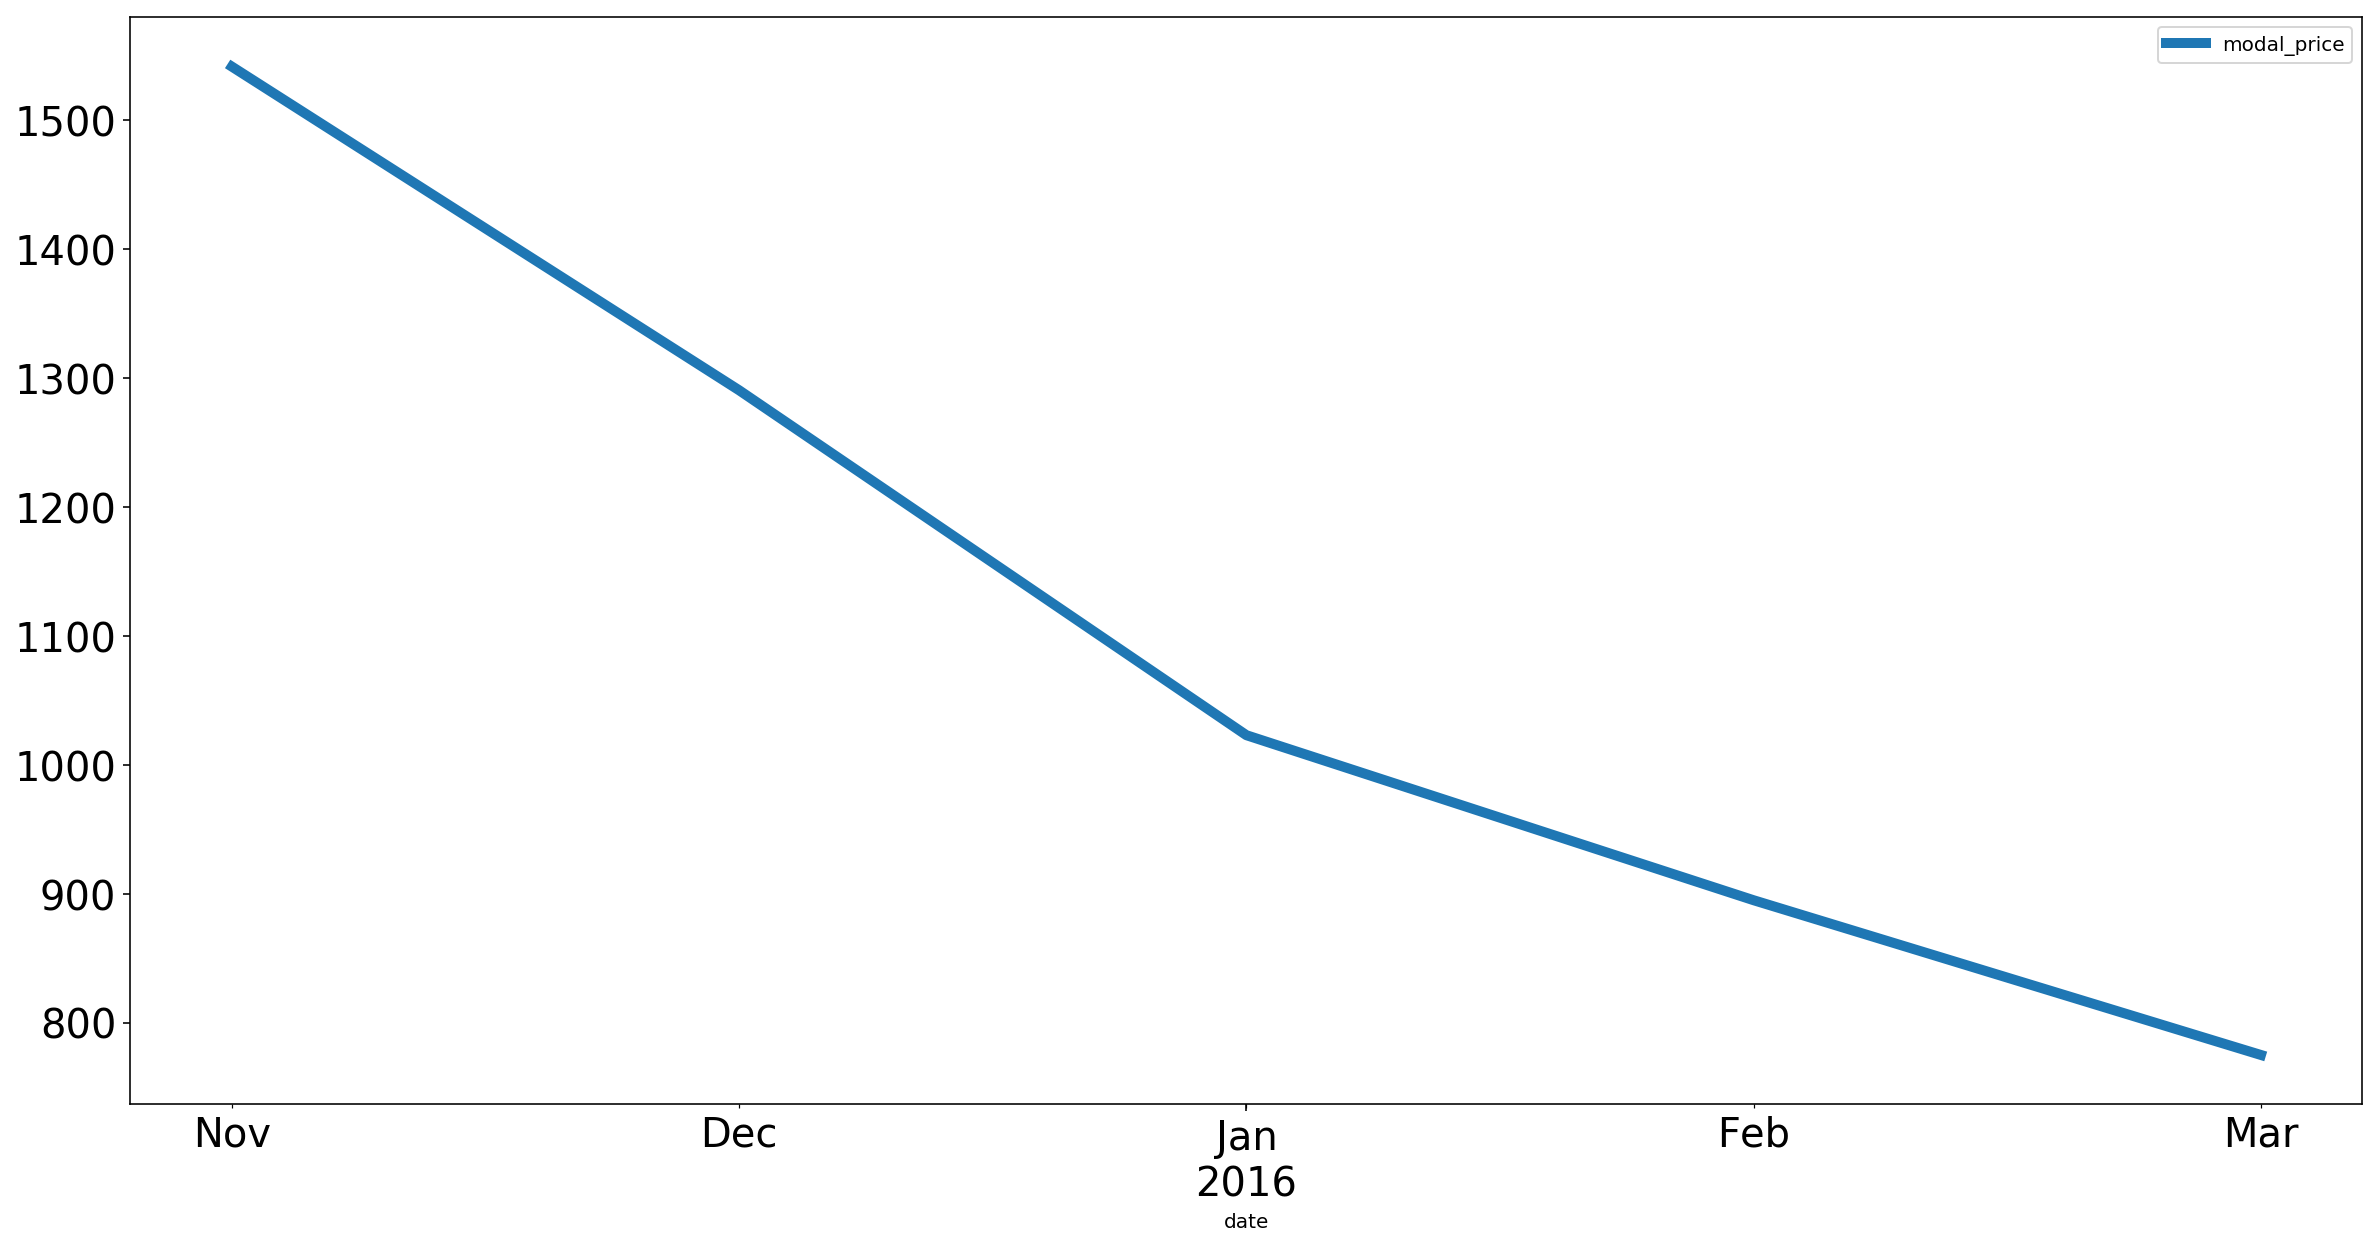

In [51]:
modal_price_trend('Kolhapur_strawberi.csv')

<b>Conclusion: </b>Downward trend can be seen.

In [52]:


def seasonal_decomposed_modal_price(filename: str, freq: int, model_name: str):
    apmc_commodity = read_file(filename)
    apmc_commodity.set_index('date', inplace = True)
    result = seasonal_decompose(apmc_commodity['modal_price'], freq = freq, model = model_name)
    print("Observed:\n ", result.observed)
    print("Trend:\n ", result.trend)
    print("Seasonal:\n ", result.seasonal)
    print("Resid:\n ", result.resid)
    result.plot()
    

Observed:
  date
2015-10-01    1583
2015-11-01    1500
2015-12-01    1081
2016-01-01     965
2016-02-01     825
2016-03-01     725
Name: modal_price, dtype: int64
Trend:
  date
2015-10-01   1583.00000
2015-11-01   1500.00000
2015-12-01   1081.00000
2016-01-01    965.00000
2016-02-01    825.00000
2016-03-01    725.00000
Name: modal_price, dtype: float64
Seasonal:
  date
2015-10-01   0.00000
2015-11-01   0.00000
2015-12-01   0.00000
2016-01-01   0.00000
2016-02-01   0.00000
2016-03-01   0.00000
Name: modal_price, dtype: float64
Resid:
  date
2015-10-01   0.00000
2015-11-01   0.00000
2015-12-01   0.00000
2016-01-01   0.00000
2016-02-01   0.00000
2016-03-01   0.00000
Name: modal_price, dtype: float64


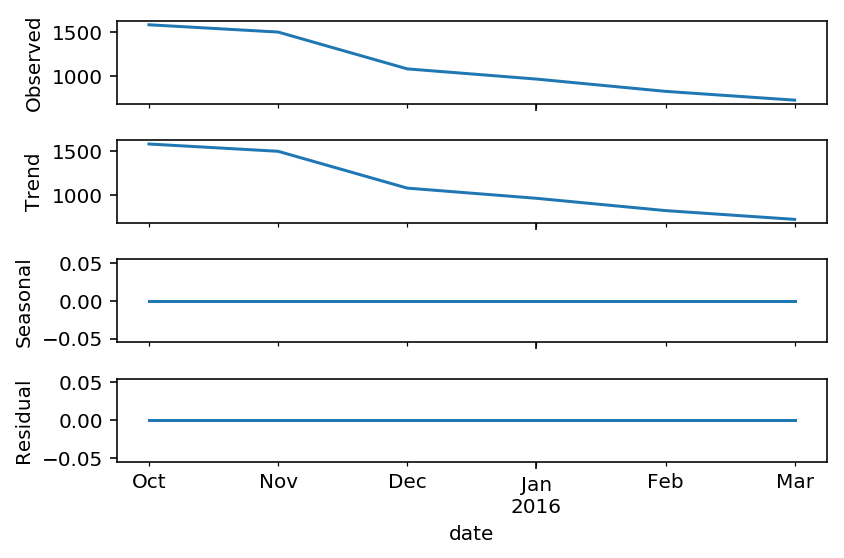

In [53]:
seasonal_decomposed_modal_price('Kolhapur_strawberi.csv', 1, 'additive')

<b>Conclusion: </b>No seasonal effect can be seen in the commodity(strawberi) of 'Kolhapur'(APMC). And a downward trend can be seen.

##### Function - 9
* <b>modal_price_trend(filename): </b>Return a plot to show the trend with rolling average (2) parameter

##### Function - 10
* <b>seasonal_decomposed_modal_price(filename, freq, modal_name): </b>Return a plot and details by doing the seasonal decomposition.

#### 5. Seasonality and Trend in the arrivals_in_qtl:

In [54]:
def seasonal_decomposed_arrivals_in_qtl(filename: str, freq: int, model_name: str):
    apmc_commodity = read_file(filename)
    apmc_commodity.set_index('date', inplace = True)
    result = seasonal_decompose(apmc_commodity['arrivals_in_qtl'], freq = freq, model = model_name)
    print("Observed:\n ", result.observed)
    print("Trend:\n ", result.trend)
    print("Seasonal:\n ", result.seasonal)
    print("Resid:\n ", result.resid)
    result.plot()

Observed:
  date
2015-10-01      53
2015-11-01      24
2015-12-01     315
2016-01-01    1065
2016-02-01     787
2016-03-01      21
Name: arrivals_in_qtl, dtype: int64
Trend:
  date
2015-10-01     53.00000
2015-11-01     24.00000
2015-12-01    315.00000
2016-01-01   1065.00000
2016-02-01    787.00000
2016-03-01     21.00000
Name: arrivals_in_qtl, dtype: float64
Seasonal:
  date
2015-10-01   0.00000
2015-11-01   0.00000
2015-12-01   0.00000
2016-01-01   0.00000
2016-02-01   0.00000
2016-03-01   0.00000
Name: arrivals_in_qtl, dtype: float64
Resid:
  date
2015-10-01   0.00000
2015-11-01   0.00000
2015-12-01   0.00000
2016-01-01   0.00000
2016-02-01   0.00000
2016-03-01   0.00000
Name: arrivals_in_qtl, dtype: float64


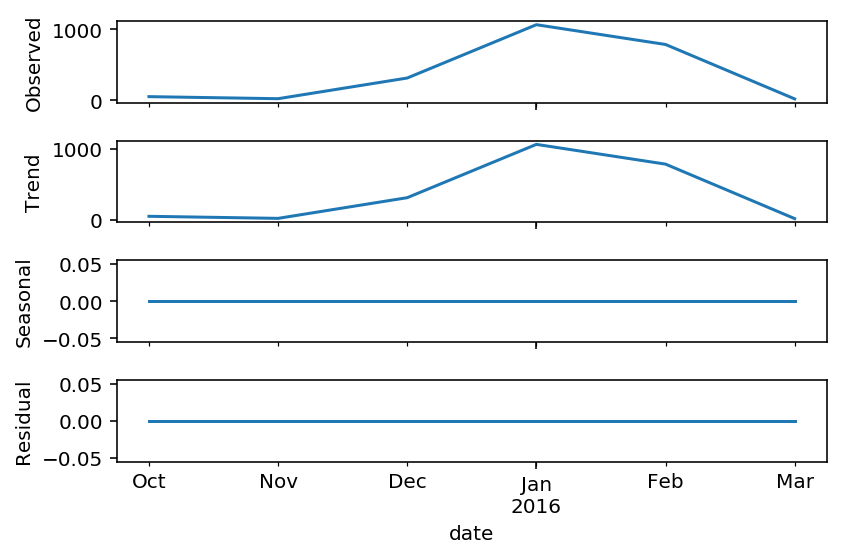

In [55]:
seasonal_decomposed_arrivals_in_qtl('Kolhapur_strawberi.csv', 1, 'additive')

<b>Conclusion: </b>No seasonality can be seen but a doenward trend can be seen as time passes.

##### Function - 11:
* <b>seasonal_decomposed_arrivals_in_qtl(filename, freq, model_name): </b>Return importand information and plot to visualise trend and seasonality of a commodity.

####  6. Overview of the created functions:

| Functions | Detail |
| --------- | ------ |
| <b>read_file(filename: str)</b> | Read the input file and return data in form of dataframe |
| <b>diff_price_zero(filename: str)</b> | Read the filename and retun details about samples having 'diff_price' equals to zero |
| <b>uniq_dist(filename: str)</b> | Read the filename and return the list of unique district names |
| <b>min_price_zero(filename: str)</b> | Read the filename and return details about the samples having minimum price equals to zero |
| <b>low_min_price(filename: str)</b> | Read the filename and return the details about the time when price of the comodity is least |
| <b>high_max_price(filename: str)</b> | Read the filename and returnthe details about the time when price of the commodity is most |
| <b>yearly_max_values(filename: str)</b> | Read the filename and return the dictionay shows max price of the commodity each year |
| <b>seasonal_max_values(filename: str)</b> | Read the filename and return a dictionary shows max price of the commodity each season |
| <b>modal_price_trend(filename: str)</b> | Read the filename and return the trend in modal price of the commodity by rolling avery of two months of window size |
| <b>seasonal_decomposed_modal_price(filename: str, freq: int, modal_name: str)</b> | Read the filename, frequency_interval, and modal_type(additive/multiplicative) and return the necessary details as well as plot about the trend, seasonality and the residual of a particular commodity modal_price |
| <b>seasonal_decomposed_arrivals_in_qtl(filename: str, freq: int, model_name: str)</b> | Read the filename, frequency_interval, and modal_type(additive/multiplicative) and return the necessary details as well as plot about the trend, seasonality and the residual of a particular commodity arrival_in_qtl |